In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("Tweet_Healthcare_Analysis.csv")
df.head()

,id,keyword,location,text,target
0,1,medication,Brazil,"Staying consistent with my workouts, it pays off.",0
1,2,allergy,Canada,This weather is perfect for a long run.,0
2,3,workout,USA,"I'm all about that gym life, workouts every day.",0
3,4,fitness,South Africa,I can't believe I have fitness.,1
4,5,headache,Brazil,My headache symptoms are just unbearable.,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        10000 non-null  int64 
 1   keyword   10000 non-null  object
 2   location  10000 non-null  object
 3   text      10000 non-null  object
 4   target    10000 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 390.8+ KB


In [4]:
df.isna().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [5]:
df.nunique()

id          10000
keyword        10
location       10
text           84
target          2
dtype: int64

In [6]:
df["keyword"].value_counts()

flu           1069
workout       1022
cancer        1021
allergy       1020
headache      1016
fitness        994
medication     988
asthma         967
diabetes       961
cold           942
Name: keyword, dtype: int64

In [7]:
df["location"].value_counts()

Canada          1044
Australia       1041
Germany         1016
UK              1009
USA             1005
Japan           1004
South Africa     985
Brazil           983
India            974
France           939
Name: location, dtype: int64

In [8]:
df["target"].value_counts()

1    5061
0    4939
Name: target, dtype: int64

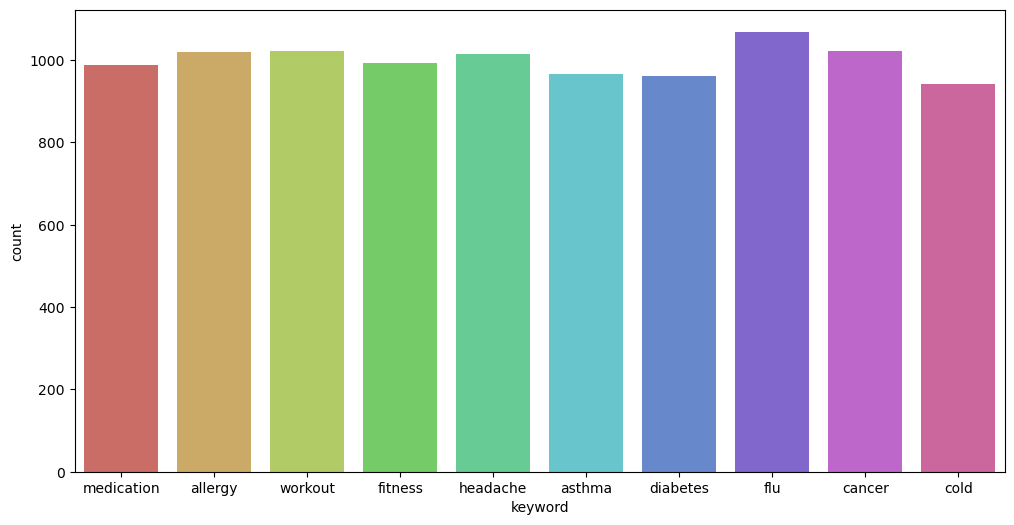

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['keyword'], data=df['keyword'], palette='hls')
plt.show()

In [10]:
df["target"] = df["target"].values.astype(str)
df["target"].value_counts()

1    5061
0    4939
Name: target, dtype: int64

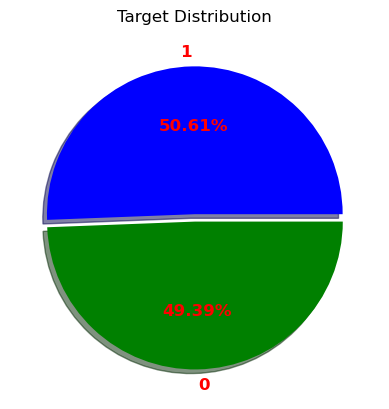

In [11]:
Target_1 = df["target"][0]
plt.pie(df["target"].value_counts(), labels=df["target"].value_counts().index, autopct='%0.2f%%',
       colors=["blue","green"], textprops={'fontsize':12, 'color':'red', 'weight':'bold'}, explode=[0.0,0.05],shadow=True)
plt.title("Target Distribution")
plt.show()

In [12]:
df_c = df.copy()
df_c.head()

,id,keyword,location,text,target
0,1,medication,Brazil,"Staying consistent with my workouts, it pays off.",0
1,2,allergy,Canada,This weather is perfect for a long run.,0
2,3,workout,USA,"I'm all about that gym life, workouts every day.",0
3,4,fitness,South Africa,I can't believe I have fitness.,1
4,5,headache,Brazil,My headache symptoms are just unbearable.,1


In [13]:
df_c["text"][11]

"Loving this healthy lifestyle I've been following."

In [14]:
def clean(x):
    x = x.lower()
    return x.strip()

In [15]:
df_c['text'] = df_c['text'].apply(lambda x: clean(x))

In [16]:
print(df_c['text'][11])
print(df_c['text'][16])

loving this healthy lifestyle i've been following.
my grandma just passed away from flu. rip


In [17]:
import re

In [18]:
def digit_clean(m):
    a = re.sub('[^a-z]+',' ',m)
    return a

In [19]:
df_c['text'] = df_c['text'].apply(lambda x: digit_clean(x))

In [20]:
df_c['text']

0        staying consistent with my workouts it pays off 
1                 this weather is perfect for a long run 
2         i m all about that gym life workouts every day 
3                         i can t believe i have fitness 
4               my headache symptoms are just unbearable 
                              ...                        
9995    fitness is a lifestyle and i m fully embracing...
9996    this diabetes is getting worse each day any su...
9997    doctor prescribed me new fitness medication ho...
9998    this headache is getting worse each day any su...
9999          anyone else suffering from headache lately 
Name: text, Length: 10000, dtype: object

In [21]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
def remove(a):
    Remove_punt = "".join([i for i in a if i not in string.punctuation])
    return Remove_punt

In [23]:
df_c['text'] = df_c['text'].apply(lambda x: remove(x))

In [24]:
print(df_c['text'][11])
print(df_c['text'][16])

loving this healthy lifestyle i ve been following 
my grandma just passed away from flu rip


In [25]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [26]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [25]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [27]:
import nltk
from wordcloud import WordCloud

In [28]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [29]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
def remove_stopwords(b):
    output = " ".join(i for i in b.split() if b.lower() not in stopwords)
    return output

In [31]:
df_c["text"] = df_c["text"].apply(lambda x: remove_stopwords(x))

In [32]:
df_c['text']

0         staying consistent with my workouts it pays off
1                  this weather is perfect for a long run
2          i m all about that gym life workouts every day
3                          i can t believe i have fitness
4                my headache symptoms are just unbearable
                              ...                        
9995    fitness is a lifestyle and i m fully embracing it
9996    this diabetes is getting worse each day any su...
9997    doctor prescribed me new fitness medication ho...
9998    this headache is getting worse each day any su...
9999           anyone else suffering from headache lately
Name: text, Length: 10000, dtype: object

In [33]:
print(df_c['text'][1])
print(df_c['text'][16])

this weather is perfect for a long run
my grandma just passed away from flu rip


In [34]:
from nltk.stem import WordNetLemmatizer
W_Lemmatizer = WordNetLemmatizer()

In [35]:
def le(z):
    limit = " ".join([W_Lemmatizer.lemmatize(i) for i in z.split()])
    return limit

In [36]:
df_c['text'] = df_c['text'].apply(lambda x: le(x))

In [37]:
df_c['text'].head()

0    staying consistent with my workout it pay off
1           this weather is perfect for a long run
2    i m all about that gym life workout every day
3                   i can t believe i have fitness
4          my headache symptom are just unbearable
Name: text, dtype: object

In [38]:
def token(y):
    tokens = re.split("w+",y)
    return tokens

In [39]:
df_c['text'] = df_c['text'].apply(lambda x: token(x))

In [40]:
df_c['text'].head()

0    [staying consistent , ith my , orkout it pay off]
1            [this , eather is perfect for a long run]
2     [i m all about that gym life , orkout every day]
3                     [i can t believe i have fitness]
4            [my headache symptom are just unbearable]
Name: text, dtype: object

In [41]:
print(df_c['text'][11])
print('-----------------')
print(df_c['text'][16])

['loving this healthy lifestyle i ve been follo', 'ing']
-----------------
['my grandma just passed a', 'ay from flu rip']


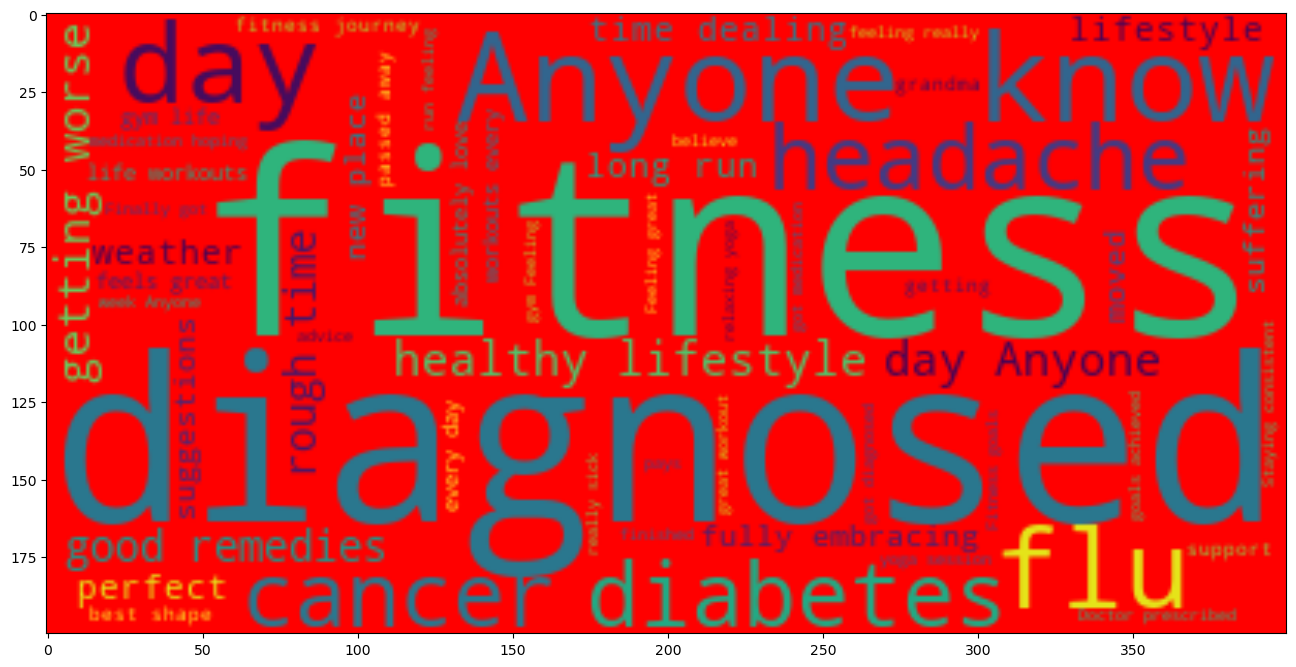

In [42]:
hc = " ".join(df['text'])
wordcloud = WordCloud(background_color='red').generate(hc)
fig,ax = plt.subplots(figsize=(16,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis=('off')
plt.show()

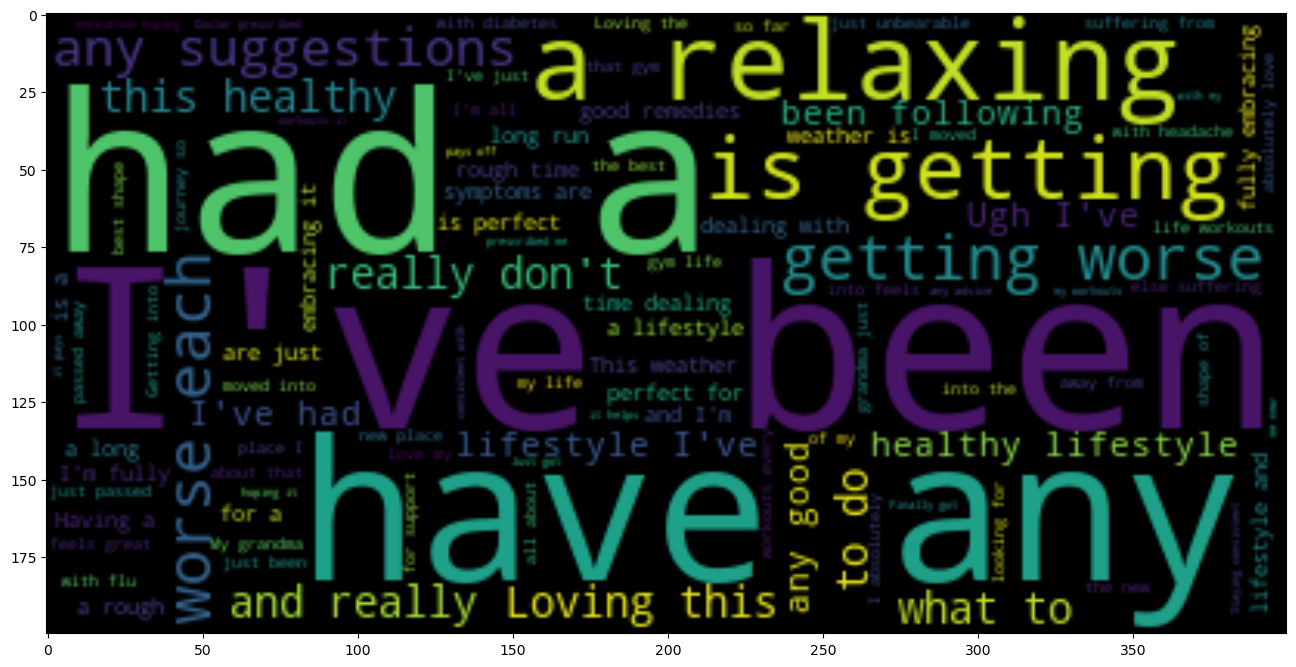

In [43]:
hc = ' '.join(df['text'])
w_cloud = WordCloud(max_words=100,background_color='black',stopwords=['fitness','diagnosed','Anyone','know','day']).generate(hc)
fig,ax = plt.subplots(figsize=(16,10))
ax.imshow(w_cloud, interpolation='bilinear')
ax.axis=('off')
plt.show()

In [44]:
df_c.head()

,id,keyword,location,text,target
0,1,medication,Brazil,"[staying consistent , ith my , orkout it pay off]",0
1,2,allergy,Canada,"[this , eather is perfect for a long run]",0
2,3,workout,USA,"[i m all about that gym life , orkout every day]",0
3,4,fitness,South Africa,[i can t believe i have fitness],1
4,5,headache,Brazil,[my headache symptom are just unbearable],1


In [45]:
df_n = df_c[['text','target']]
df_n.head()

,text,target
0,"[staying consistent , ith my , orkout it pay off]",0
1,"[this , eather is perfect for a long run]",0
2,"[i m all about that gym life , orkout every day]",0
3,[i can t believe i have fitness],1
4,[my headache symptom are just unbearable],1


In [48]:
pip install contractions

  Obtaining dependency information for contractions from https://files.pythonhosted.org/packages/bb/e4/725241b788963b460ce0118bfd5c505dd3d1bdd020ee740f9f39044ed4a7/contractions-0.1.73-py2.py3-none-any.whl.metadata
  Obtaining dependency information for textsearch>=0.0.21 from https://files.pythonhosted.org/packages/e2/0f/6f08dd89e9d71380a369b1f5b6c97a32d62fc9cfacc1c5b8329505b9e495/textsearch-0.0.24-py2.py3-none-any.whl.metadata
  Obtaining dependency information for anyascii from https://files.pythonhosted.org/packages/4f/7b/a9a747e0632271d855da379532b05a62c58e979813814a57fa3b3afeb3a4/anyascii-0.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for pyahocorasick from https://files.pythonhosted.org/packages/36/76/d83c60ec7a202cbfeffaa9649d0fee6ddcb974622e411b86211ff3572549/pyahocorasick-2.1.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/289.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/289.9 kB ? eta -:--:--
   -

In [46]:
from tqdm import tqdm
import contractions
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer
import re 
import nltk
wordnet = WordNetLemmatizer()
nltk.download = ('stopwords')
nltk.download = ('wordnet')
stopword = nltk.corpus.stopwords.words('english')

preprocessed_reviews =[]

for i in tqdm(df['text'].values):
    i = contractions.fix(i)
    i = BeautifulSoup(i, 'lxml').get_text()
    i = re.sub(r"https\S+","", i)
    i = re.sub("\S*\d\S*","", i).strip()
    i = re.sub('[^a-zA-Z\s]+'," ", i)
    tokens = i.split()
    tokens = [wordnet.lemmatize(j) for j in tokens if j.lower() not in stopwords]
    clean_txt = ' '.join(tokens).lower()
    preprocessed_reviews.append(clean_txt.strip())

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:03<00:00, 3241.00it/s]


In [47]:
preprocessed_reviews

['staying consistent workout pay',
 'weather perfect long run',
 'gym life workout every day',
 'cannot believe fitness',
 'headache symptom unbearable',
 'staying consistent workout pay',
 'amazing run feeling fit',
 'got diagnosed diabetes anyone advice',
 'staying consistent workout pay',
 'anyone know good treatment diabetes',
 'getting best shape life',
 'loving healthy lifestyle following',
 'finally got medication headache',
 'rough time dealing diabetes',
 'anyone else suffering flu lately',
 'diagnosed cancer looking support',
 'grandma passed away flu rip',
 'finished great workout gym feeling energized',
 'absolutely love fitness journey far',
 'fitness lifestyle fully embracing',
 'loving new place moved feel great',
 'fitness goal achieved day',
 'finally got medication flu',
 'absolutely love fitness journey far',
 'flu symptom unbearable',
 'got diagnosed fitness anyone advice',
 'fitness goal achieved day',
 'absolutely love fitness journey far',
 'cancer getting worse 

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

In [49]:
tf_idf_vect = TfidfVectorizer(max_features=1000)
tf_idf_vect.fit(preprocessed_reviews)
print('feature names :', tf_idf_vect.get_feature_names_out()[5000:5050])
final_counts_tfidf = tf_idf_vect.transform(preprocessed_reviews)
print("Count vectorizer :", type(final_counts_tfidf))

feature names : []
Count vectorizer : <class 'scipy.sparse._csr.csr_matrix'>


In [50]:
final_counts_tfidf.shape

(10000, 89)

In [51]:
final_counts_tfidf = tf_idf_vect.transform(preprocessed_reviews).toarray()
pd.DataFrame(final_counts_tfidf).head()

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.396234,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.517959,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.411880,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.652322,0.0,0.0,0.652322,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.621912,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


In [52]:
df['target'] = pd.to_numeric(df['target'], errors = 'coerce')

In [53]:
y = df['target']
x = final_counts_tfidf

In [54]:
y.value_counts()

1    5061
0    4939
Name: target, dtype: int64

In [55]:
x.shape

(10000, 89)

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [57]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [58]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgboost.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [59]:
y_pred_train = xgboost.predict(x_train)
y_pred_test = xgboost.predict(x_test)

In [60]:
print(y_pred_train)
print('------$-------$------')
print(y_pred_test)

[0 1 0 ... 0 0 0]
------$-------$------
[1 1 0 ... 1 1 1]


In [61]:
from sklearn.metrics import classification_report, accuracy_score

In [62]:
print("Training Accuracy :", accuracy_score(y_train, y_pred_train))
print("*************"*5)
print("Test Accuracy :", accuracy_score(y_test, y_pred_test))

Training Accuracy : 1.0
*****************************************************************
Test Accuracy : 1.0
